In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("car_prices.csv")

In [17]:
# First 5 rows
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [18]:
# Data types & non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [19]:
# Shape of dataset
df.shape

(558837, 16)

In [20]:
# Column names & data types
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [21]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

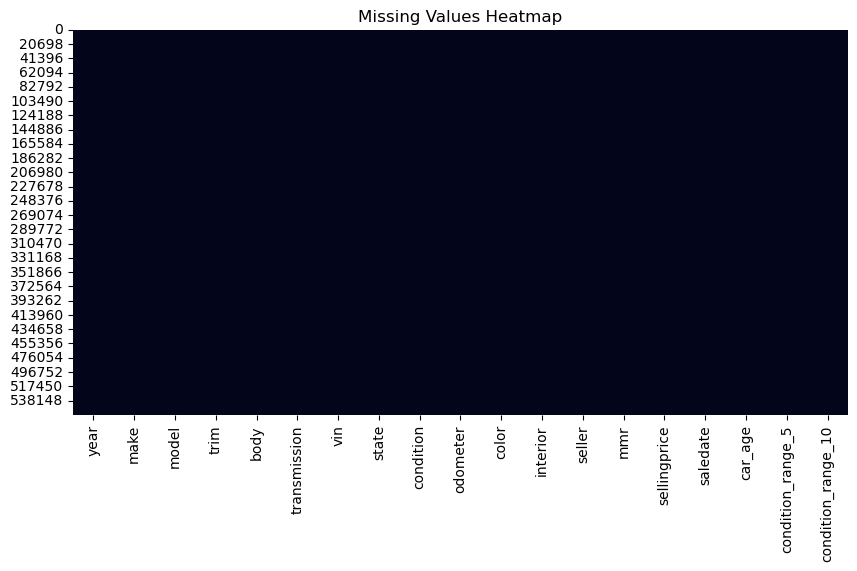

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [58]:
# Numerical → median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical → mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df = df.drop_duplicates()

In [27]:
df['sellingprice'].agg(['mean','min','max'])

mean     13611.326356
min          1.000000
max     230000.000000
Name: sellingprice, dtype: float64

In [28]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime',
       '4802', '9410', '1167', '2172', '14872', '12655', '15719', '6388',
       '16633', '11034', '2711', '6864', '339', '18384', '9887', '9837',
       '20379', '20627', '721', '6158', '2817', '5705', '18561', '2846',
       '9562', '5001'], dtype=object)

In [32]:
df['make'].nunique(), df['model'].nunique()

(96, 973)

In [34]:
df[df['sellingprice'] > 165000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


In [35]:
df['model'].value_counts().head(5)

model
Altima    29748
F-150     14479
Fusion    12946
Camry     12545
Escape    11861
Name: count, dtype: int64

In [36]:
df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)

make
Rolls-Royce    153488.235294
Ferrari        127210.526316
Lamborghini    112625.000000
Bentley         74367.672414
airstream       71000.000000
                   ...      
dodge tk          550.000000
Geo               528.947368
dot               500.000000
ford truck        483.333333
Daewoo            400.000000
Name: sellingprice, Length: 96, dtype: float64

In [37]:
df.groupby('interior')['sellingprice'].min()

interior
beige         100.0
black           1.0
blue          150.0
brown         200.0
burgundy      175.0
gold          250.0
gray            1.0
green         100.0
off-white     900.0
orange       1200.0
purple        200.0
red           200.0
silver        150.0
tan           100.0
white         350.0
yellow       3100.0
—             150.0
Name: sellingprice, dtype: float64

In [38]:
df.groupby('year')['odometer'].max().sort_values(ascending=False)

year
1999    999999.0
2013    999999.0
2011    999999.0
2010    999999.0
2009    999999.0
2008    999999.0
2007    999999.0
2006    999999.0
2005    999999.0
2004    999999.0
2003    999999.0
2002    999999.0
2001    999999.0
2014    999999.0
1998    999999.0
1997    999999.0
1996    999999.0
1993    999999.0
2012    999999.0
2000    462579.0
1995    396793.0
1992    379307.0
1994    356402.0
1991    274149.0
1986    273327.0
1990    265498.0
1988    241751.0
1987    230946.0
1989    218052.0
1984    170799.0
1985    121644.0
2015    100454.0
1982     85738.0
1983     42697.0
Name: odometer, dtype: float64

In [39]:
df['car_age'] = 2025 - df['year']
df[['year','car_age']].head()

,year,car_age
0,2015,10
1,2015,10
2,2014,11
3,2015,10
4,2014,11


In [40]:
df[(df['condition'] >= 48) & (df['odometer'] > 90000)].shape[0]

746

In [41]:
df[df['year'] > 2013].groupby('state')['sellingprice'].mean().sort_values(ascending=False)

state
oh                   28020.221053
ab                   25204.255319
nj                   24237.063973
on                   22962.560386
qc                   22722.938144
                         ...     
3vwd17aj5fm225953    13200.000000
3vwd17aj8fm239622    13200.000000
3vwd17aj4fm201708    13200.000000
3vwd17aj3fm276741    13200.000000
ok                   10600.000000
Name: sellingprice, Length: 64, dtype: float64

In [42]:
threshold = df['condition'].quantile(0.80)

df[df['condition'] >= threshold] \
  .groupby('make')['sellingprice'] \
  .mean() \
  .sort_values()

make
Isuzu            1125.000000
Oldsmobile       1910.000000
honda            4233.333333
Saturn           5700.406504
subaru           6200.000000
                   ...      
Tesla           66580.000000
Bentley         96040.000000
Lamborghini    113000.000000
Ferrari        137888.888889
Rolls-Royce    152714.285714
Name: sellingprice, Length: 76, dtype: float64

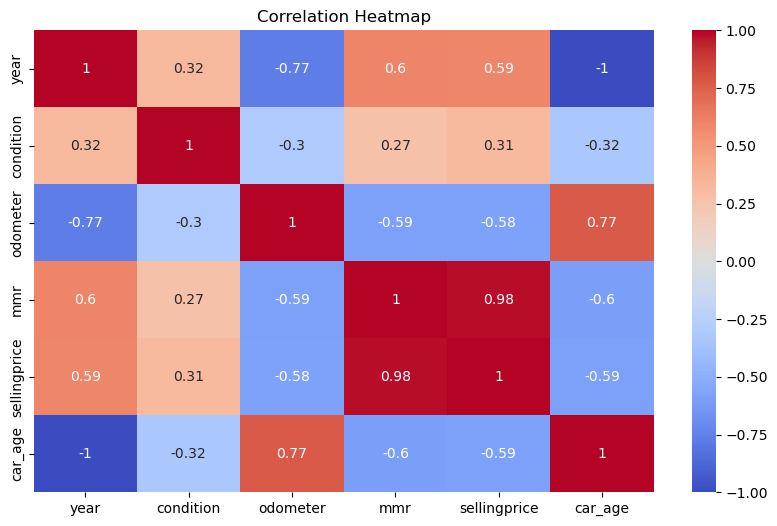

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

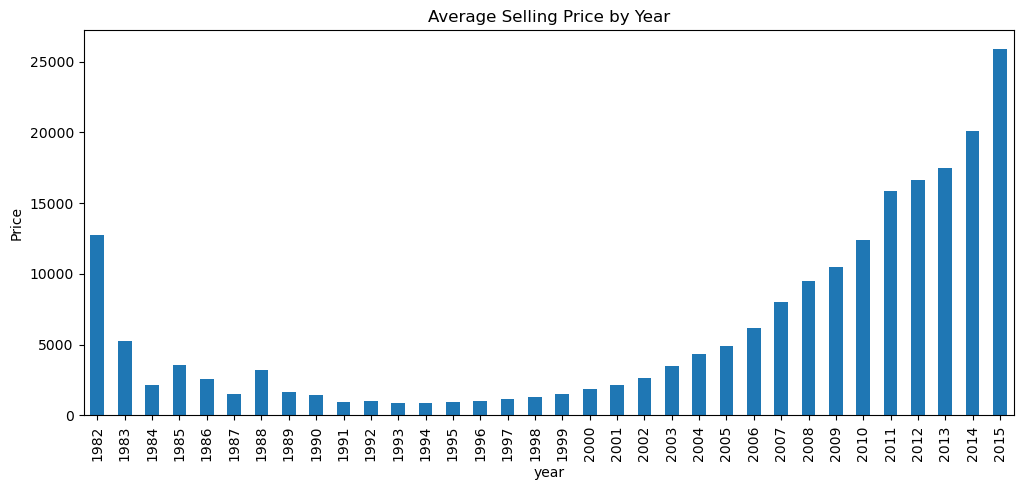

In [44]:
df.groupby('year')['sellingprice'].mean().plot(kind='bar', figsize=(12,5))
plt.title("Average Selling Price by Year")
plt.ylabel("Price")
plt.show()

C:\Users\RG\AppData\Local\Temp\ipykernel_16436\1140362779.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['odometer'], bins=10))['sellingprice'].mean().plot(kind='line')


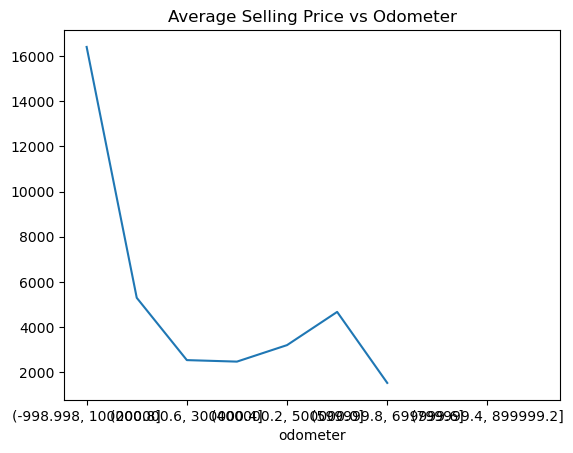

In [45]:
df.groupby(pd.cut(df['odometer'], bins=10))['sellingprice'].mean().plot(kind='line')
plt.title("Average Selling Price vs Odometer")
plt.show()

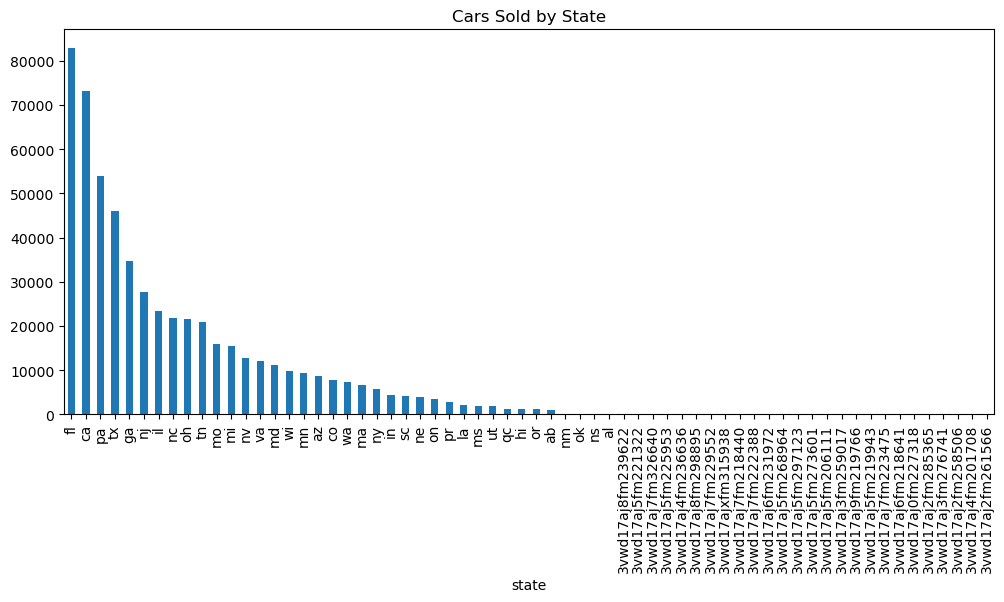

In [46]:
df['state'].value_counts().plot(kind='bar', figsize=(12,5))
plt.title("Cars Sold by State")
plt.show()

C:\Users\RG\AppData\Local\Temp\ipykernel_16436\3400408407.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('condition_range_5')['sellingprice'].mean().plot(kind='bar', figsize=(14,5))


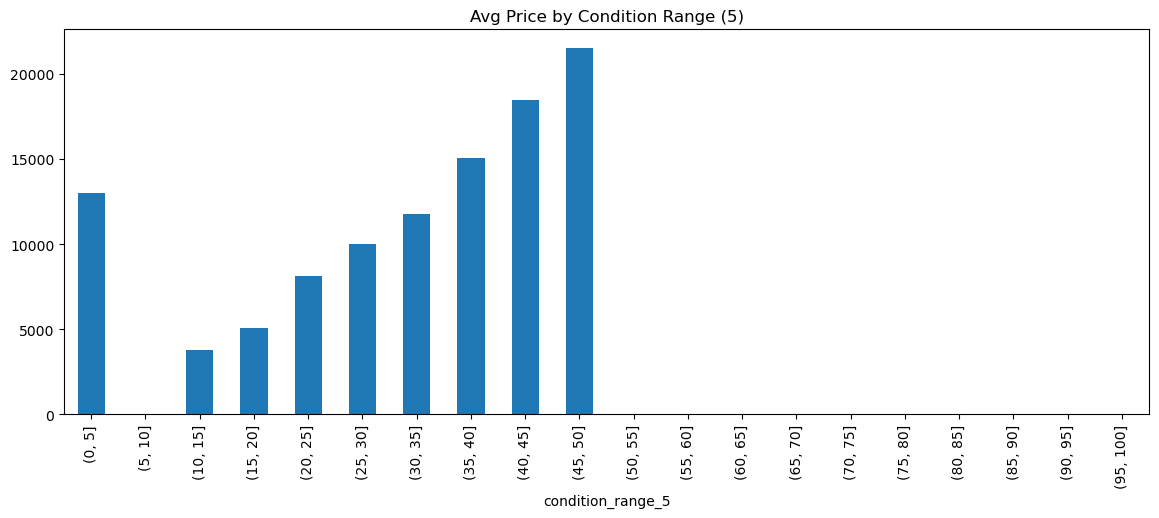

In [47]:
df['condition_range_5'] = pd.cut(df['condition'], bins=range(0,101,5))
df.groupby('condition_range_5')['sellingprice'].mean().plot(kind='bar', figsize=(14,5))
plt.title("Avg Price by Condition Range (5)")
plt.show()

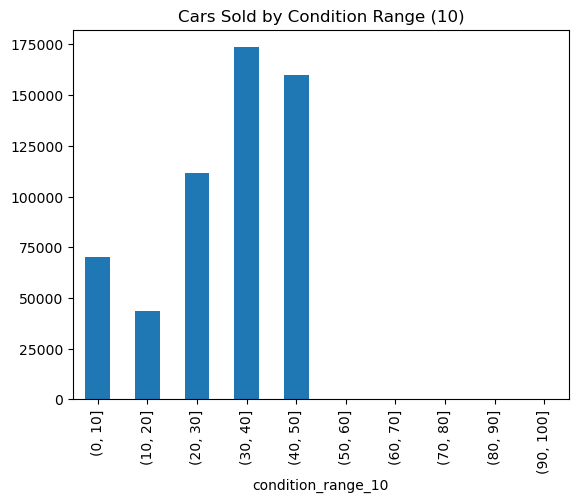

In [48]:
df['condition_range_10'] = pd.cut(df['condition'], bins=range(0,101,10))
df['condition_range_10'].value_counts().sort_index().plot(kind='bar')
plt.title("Cars Sold by Condition Range (10)")
plt.show()

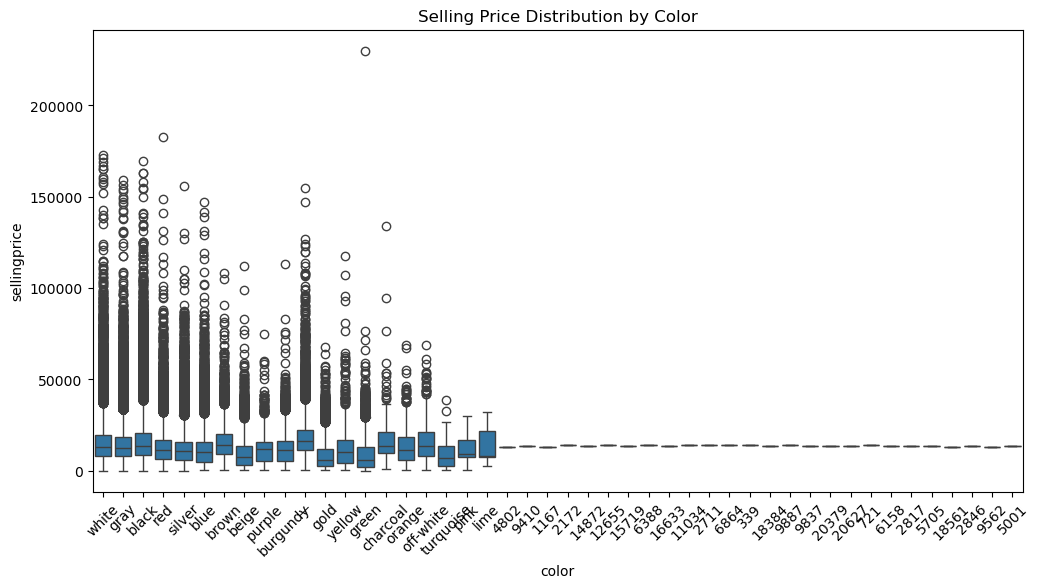

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x='color', y='sellingprice', data=df)
plt.xticks(rotation=45)
plt.title("Selling Price Distribution by Color")
plt.show()

In [56]:
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[
    (df['sellingprice'] >= Q1 - 1.5 * IQR) &
    (df['sellingprice'] <= Q3 + 1.5 * IQR)
]

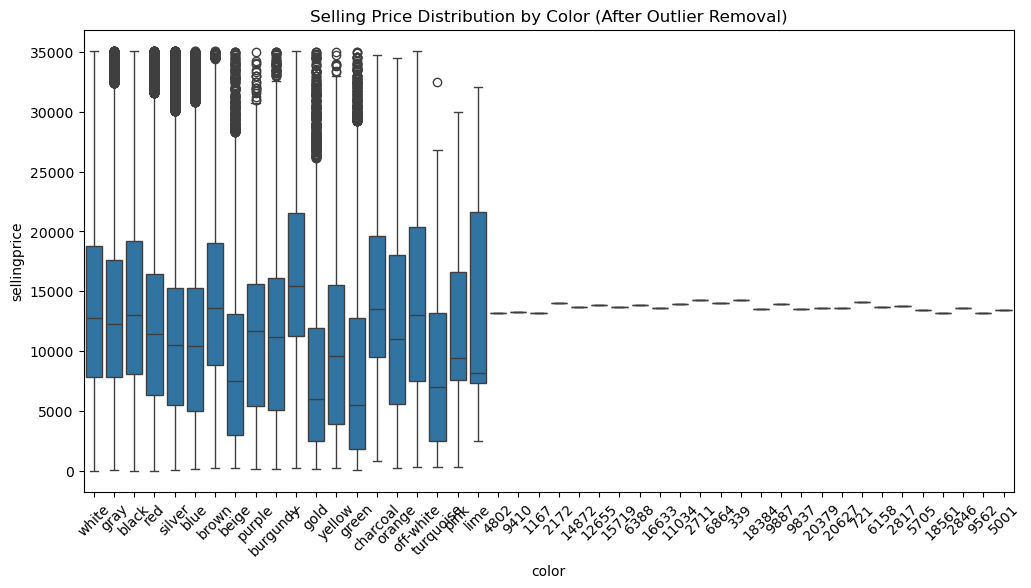

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='color', y='sellingprice', data=df_no_outliers)
plt.xticks(rotation=45)
plt.title("Selling Price Distribution by Color (After Outlier Removal)")
plt.show()